Missing Values:
 Close    0
dtype: int64


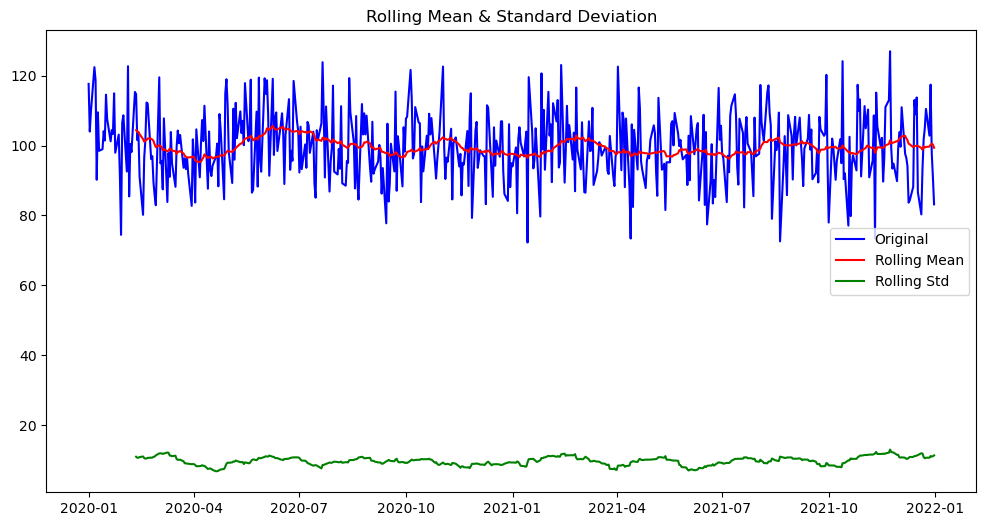

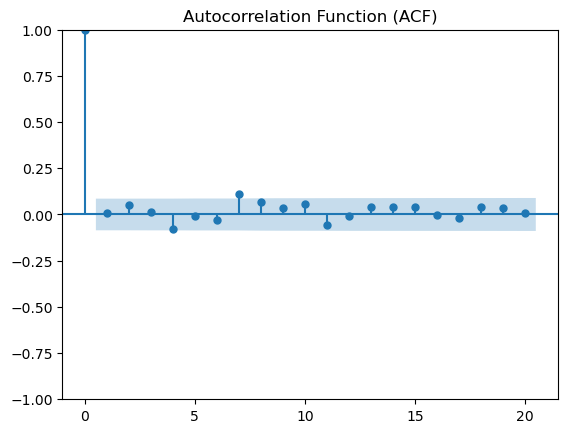

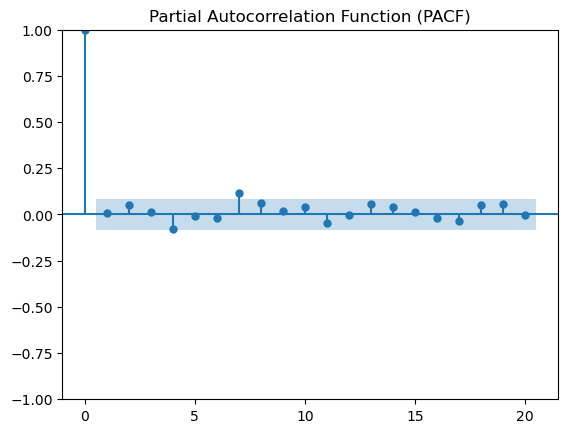

/Users/ishita/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ishita/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ishita/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ishita/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Squared Error: 139.33843825985804


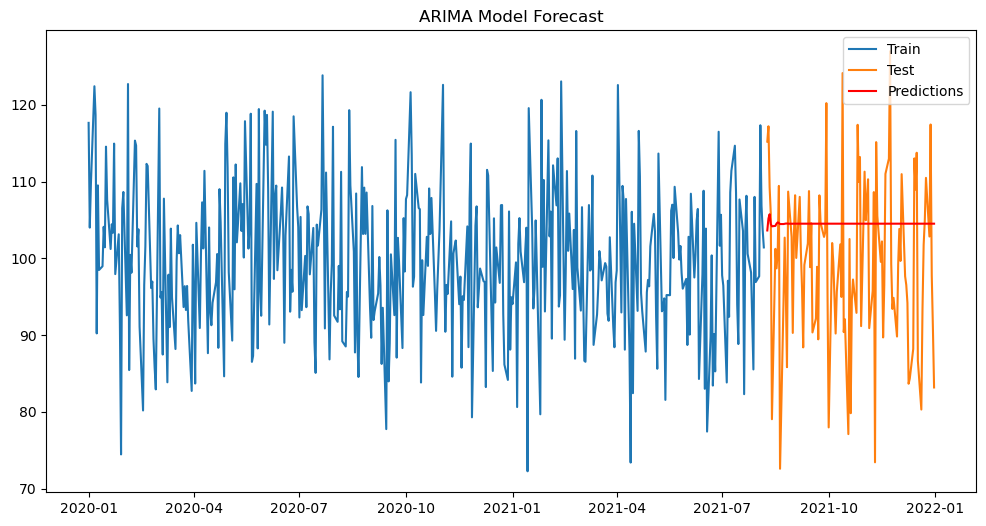

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2022-01-01', freq='B')
prices = np.random.normal(loc=100, scale=10, size=len(dates))

data = pd.DataFrame({'Date': dates, 'Close': prices})

data = pd.read_csv('historical_stock_prices.csv')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

data.fillna(method='ffill', inplace=True)

rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

plot_acf(data['Close'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data['Close'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

model = ARIMA(train_data['Close'], order=(5,1,0))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

mse = mean_squared_error(test_data['Close'], predictions)
print('Mean Squared Error:', mse)

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, predictions, color='red', label='Predictions')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import datetime

np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2022-01-01', freq='B')
prices = np.random.normal(loc=100, scale=10, size=len(dates))
e
data = pd.DataFrame({'Date': dates, 'Close': prices})

data.to_csv('historical_stock_prices.csv', index=False)

